In [96]:
% matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import os

languageFix = (lambda c:'English' if c == 'N/A (GQ/vacant)' 
                                       else 'Tagalog' if c == 'Filipino' 
                                       #else '"Chinese"' if c == 'Chinese' 
                                       else 'Mandarin' if c == 'Chinese'
                                       #else 'Chinese' if c == 'Cantonese' 
                                       #else 'Chinese' if c == 'Min Nan Chinese' 
                                       else 'Serbo-Croatian' if c == 'Serbian' 
                                       else 'Serbo-Croatian' if c == 'Croatian' 
                                       else 'Serbo-Croatian' if c == 'Bosnian' 
                                       else 'Serbo-Croatian' if c == 'Serbocroatian' 
                                       else c)

languageFix( ' -> Filipino'[4:])

'Tagalog'

In [22]:
HomeLang = pd.read_csv('data/home_language_NY_CA.csv', skiprows=3)
HomeLang.columns = ['col1', 'ppl']
HomeLang['geo'] = HomeLang.col1.apply(lambda c: c if c in ['New York', 'California'] else None)
HomeLang['lang'] = HomeLang.col1.apply(lambda c: None if c in ['New York', 'California'] 
                                       else  ' -> ' + languageFix(c[4:])).fillna(method='ffill')
HomeLang = HomeLang[~HomeLang.ppl.isnull()][['geo', 'lang', 'ppl']]
HomeLang['lang'] = HomeLang['lang'].apply(lambda s: s[4:])
HomeLang = HomeLang.groupby(['lang', 'geo'])['ppl'].sum().unstack().sort_values('New York', ascending=False)
HomeLang.columns = ['CA', 'NY']

HomeLang

,CA,NY
lang,,
English,22856501.0,14091692.0
Spanish,10525320.0,2818953.0
Chinese,1181658.0,586689.0
Russian,157294.0,221202.0
Italian,59371.0,164523.0
Haitian,8538.0,155232.0
Yiddish,2757.0,137544.0
French,128280.0,130911.0
Bengali,26613.0,119008.0


In [97]:
nycMicro = pd.read_csv('data/pums_micro_NYC.csv').drop('index', axis=1)
laMicro = pd.read_csv('data/pums_micro_LA.csv').drop('index', axis=1)

In [98]:
column = 'language'

nycMicro.language = nycMicro.language.apply(languageFix)

nyLang = nycMicro.groupby(column)[['PWGTP']].sum()
nyLang.index.name = 'lang'
nyLang.columns = ['NY']

laLang = laMicro.groupby(column)[['PWGTP']].sum()
laLang.index.name = 'lang'
laLang.columns = ['CA']


HomeLang = nyLang.join(laLang).sort_values('NY', ascending=False)

HomeLang

,NY,CA
lang,,
English,4641555,NaN
Spanish,1956822,3731336.0
Mandarin,391946,109887.0
Russian,190418,48752.0
Haitian,106118,3883.0
Bengali,105753,8296.0
Cantonese,92745,79854.0
Yiddish,86296,1523.0
French,83450,39908.0


In [99]:
Pivot = HomeLang[HomeLang.index != 'English'].copy()
#Pivot = Pivot[(Pivot.index != 'English')&(Pivot.index != 'Spanish')]

Pivot.loc['Tongan', 'NY'] = 1

Pivot['total'] = Pivot.sum(axis=1)

Pivot.CA = 100 * Pivot.CA / Pivot.CA.sum()
Pivot.NY = 100 * Pivot.NY / Pivot.NY.sum()

Pivot['skew'] = (Pivot.CA / Pivot.NY).apply(lambda x: math.log(x))
Pivot['ratio_ca'] = (Pivot.CA / Pivot.NY)
Pivot['ratio_ny'] = (Pivot.NY / Pivot.CA)

Pivot[Pivot.total>10000].sort_values('ratio_ca', ascending=False)#.sort_values('skew')

,NY,CA,total,skew,ratio_ca,ratio_ny
lang,,,,,,
Armenian,0.097255,3.278635,173062.0,3.517841,33.711568,0.029663
Khmer,0.075263,0.579946,32888.0,2.041942,7.705555,0.129777
Farsi,0.225280,1.456005,83992.0,1.866109,6.463099,0.154725
Vietnamese,0.284597,1.667658,97243.0,1.768100,5.859711,0.170657
Thai,0.141495,0.419510,27202.0,1.086824,2.964842,0.337286
Tagalog,1.282512,3.702369,241393.0,1.060152,2.886810,0.346403
Indonesian,0.077891,0.211692,13981.0,0.999822,2.717797,0.367945
Korean,1.792364,3.531027,252532.0,0.678054,1.970040,0.507604
Japanese,0.565138,1.000754,73812.0,0.571439,1.770813,0.564712


In [100]:
threshold = 0.1

t = Pivot[((Pivot.CA > threshold)|(Pivot.NY > threshold))&(Pivot['skew']<7)&(~Pivot.index.str.startswith('Other'))
         &(Pivot.total > 11000)]

t.sort_values('ratio_ca', ascending=False)

,NY,CA,total,skew,ratio_ca,ratio_ny
lang,,,,,,
Armenian,0.097255,3.278635,173062.0,3.517841,33.711568,0.029663
Khmer,0.075263,0.579946,32888.0,2.041942,7.705555,0.129777
Farsi,0.225280,1.456005,83992.0,1.866109,6.463099,0.154725
Vietnamese,0.284597,1.667658,97243.0,1.768100,5.859711,0.170657
Thai,0.141495,0.419510,27202.0,1.086824,2.964842,0.337286
Tagalog,1.282512,3.702369,241393.0,1.060152,2.886810,0.346403
Indonesian,0.077891,0.211692,13981.0,0.999822,2.717797,0.367945
Korean,1.792364,3.531027,252532.0,0.678054,1.970040,0.507604
Japanese,0.565138,1.000754,73812.0,0.571439,1.770813,0.564712


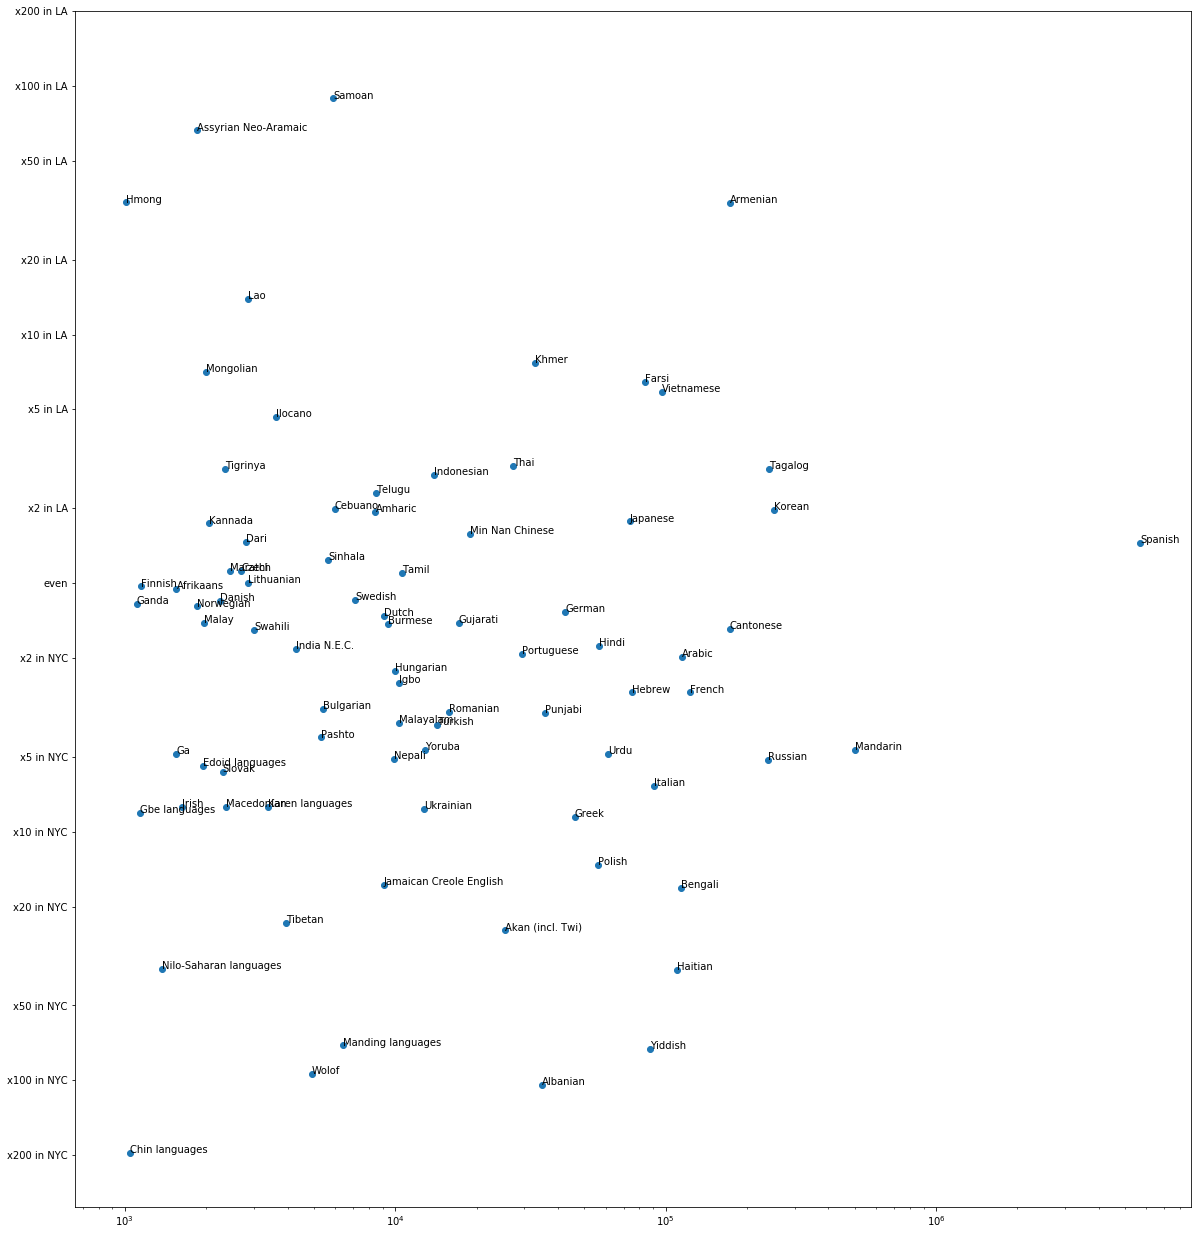

In [101]:
threshold = 0.01

t = Pivot[((Pivot.CA > threshold)|(Pivot.NY > threshold))&(Pivot['skew']<7)&(~Pivot.index.str.startswith('Other'))
         &(Pivot.total > 1000)]

x = t['total']
y = t['skew']
n = list(t.reset_index().lang)

fig, ax = plt.subplots()
ax.scatter(x, y)

ticks = [2, 5, 10, 20, 50, 100, 200]

ax.set_yticks((list(reversed([-math.log(tk) for tk in ticks])) + [0] + [math.log(tk) for tk in ticks]))

ax.set_xscale('log')

fig.set_size_inches(20, 22)

ax.set_yticklabels((list(reversed(['x' + str(tk) + ' in NYC' for tk in ticks])) + ['even'] + ['x' + str(tk) + ' in LA' for tk in ticks]))

for i, txt in enumerate(n):
    #print txt, x[i], y[i]
    ax.annotate(txt, (x[i], y[i]))

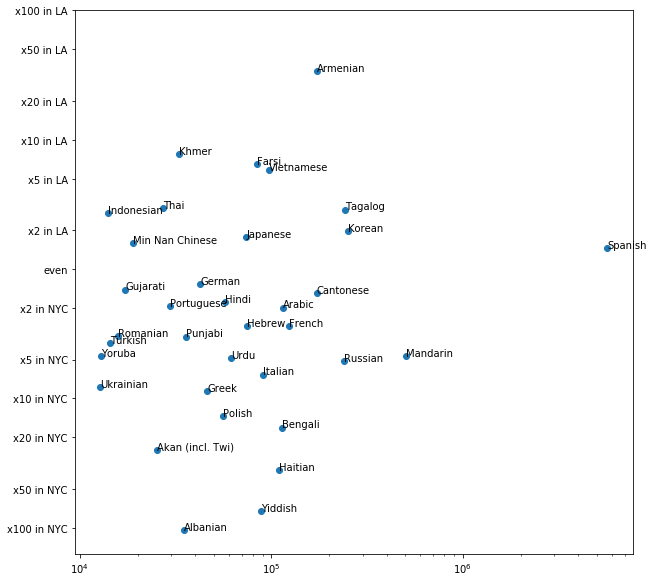

In [102]:
threshold = 0.1

t = Pivot[((Pivot.CA > threshold)|(Pivot.NY > threshold))&(Pivot['skew']<7)&(~Pivot.index.str.startswith('Other'))
         &(Pivot.total > 11000)]

x = t['total']
y = t['skew']
n = list(t.reset_index().lang)

fig, ax = plt.subplots()
ax.scatter(x, y)

ticks = [2, 5, 10, 20, 50, 100] #, 200]

ax.set_yticks((list(reversed([-math.log(tk) for tk in ticks])) + [0] + [math.log(tk) for tk in ticks]))

ax.set_xscale('log')

fig.set_size_inches(10, 10)

ax.set_yticklabels((list(reversed(['x' + str(tk) + ' in NYC' for tk in ticks])) + ['even'] + ['x' + str(tk) + ' in LA' for tk in ticks]))

for i, txt in enumerate(n):
    #print txt, x[i], y[i]
    ax.annotate(txt, (x[i], y[i]))

In [306]:
list(reversed([-math.log(x) for x in ticks])) + [0] + [math.log(x) for x in ticks]


[-6.907755278982137,
 -4.605170185988092,
 -3.912023005428146,
 -2.995732273553991,
 -2.302585092994046,
 -1.6094379124341003,
 -0.6931471805599453,
 0,
 0.6931471805599453,
 1.6094379124341003,
 2.302585092994046,
 2.995732273553991,
 3.912023005428146,
 4.605170185988092,
 6.907755278982137]

In [319]:
(list(reversed([-math.log(tk) for tk in ticks])) + [0] + [math.log(tk) for tk in ticks])

[-6.214608098422191,
 -5.298317366548036,
 -4.605170185988092,
 -3.912023005428146,
 -2.995732273553991,
 -2.302585092994046,
 -1.6094379124341003,
 -0.6931471805599453,
 0,
 2.302585092994046,
 2.995732273553991,
 3.912023005428146,
 4.605170185988092,
 5.298317366548036,
 6.214608098422191]

In [262]:
list(reversed(['x' + str(x) + ' in NY'  for x in [2, 5, 10, 20, 50, 100, 1000, 10000]])) + ['equal'] +  ['x' + str(x) + ' in CA'  for x in [2, 5, 10, 20, 50, 100, 1000, 10000]]

['x10000 in NY',
 'x1000 in NY',
 'x100 in NY',
 'x50 in NY',
 'x20 in NY',
 'x10 in NY',
 'x5 in NY',
 'x2 in NY',
 'equal',
 'x2 in CA',
 'x5 in CA',
 'x10 in CA',
 'x20 in CA',
 'x50 in CA',
 'x100 in CA',
 'x1000 in CA',
 'x10000 in CA']

In [250]:
def labelConvert(x):
    return int(math.exp(abs(x)))

[labelConvert(x.get_position()[1]) for x in ax.get_yticklabels()]

[99, 49, 19, 9, 4, 2, 1, 2, 4, 10, 19, 49, 100, 999, 10000]